In [2]:
import os
import numpy as np
import pandas as pd


In [3]:
# Set download URL
host = 'https://orca.casa.ucl.ac.uk'
path = '~jreades/data/London-2021-10-listings.csv.gz'  
url  = f'{host}/{path}'

# your code here
df = pd.read_csv(url, compression='gzip', low_memory=False)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 70,617 x 74


In [4]:
df.describe(percentiles=[.05,0.95]) # 0.5 is always shown

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.061700e+04,7.061700e+04,7.061700e+04,69942.000000,69942.000000,0.0,70617.000000,70617.000000,70617.000000,0.0,...,47998.000000,48035.000000,47997.000000,47993.000000,0.0,70617.000000,70617.000000,70617.000000,70617.000000,49530.000000
mean,2.773223e+07,2.021091e+13,1.051931e+08,29.206371,29.206371,NaN,51.509848,-0.128761,2.996545,NaN,...,4.792491,4.808287,4.748199,4.634310,NaN,32.757141,25.487461,6.141467,0.555957,0.690920
std,1.485129e+07,1.048445e+01,1.121846e+08,142.976689,142.976689,NaN,0.047755,0.096498,1.918134,NaN,...,0.473965,0.466754,0.427643,0.525474,NaN,128.979783,111.826130,29.774965,5.707299,1.697638
min,1.391300e+04,2.021091e+13,2.010000e+03,0.000000,0.000000,NaN,51.297330,-0.508870,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
5%,3.726669e+06,2.021091e+13,2.125620e+06,0.000000,0.000000,NaN,51.423398,-0.294824,1.000000,NaN,...,4.000000,4.000000,4.000000,4.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.020000
50%,2.738781e+07,2.021091e+13,5.302758e+07,1.000000,1.000000,NaN,51.513910,-0.126280,2.000000,NaN,...,4.960000,5.000000,4.880000,4.770000,NaN,1.000000,1.000000,1.000000,0.000000,0.300000
95%,5.069131e+07,2.021091e+13,3.530251e+08,92.000000,92.000000,NaN,51.586680,0.018792,6.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,138.000000,94.000000,12.000000,0.000000,2.440000
max,5.216677e+07,2.021091e+13,4.221723e+08,3508.000000,3508.000000,NaN,51.686410,0.288570,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,864.000000,863.000000,249.000000,62.000000,118.290000


In [5]:
df['price']

0         $65.00
1         $75.00
2        $307.00
3        $150.00
4        $195.00
          ...   
70612     $32.00
70613    $336.00
70614    $120.00
70615    $206.00
70616     $80.00
Name: price, Length: 70617, dtype: object

In [6]:
df.dropna(axis=0,
          how='any',
          thresh=None,
          subset=['id','latitude', 'longitude','price'],
          inplace=False)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20210909211636,2021-09-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.89,4.63,4.74,NaN,f,2,1,1,0,0.17
1,15400,https://www.airbnb.com/rooms/15400,20210909211636,2021-09-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.80
2,17402,https://www.airbnb.com/rooms/17402,20210909211636,2021-09-11,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,15,15,0,0,0.35
3,17506,https://www.airbnb.com/rooms/17506,20210909211636,2021-09-11,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
4,24328,https://www.airbnb.com/rooms/24328,20210909211636,2021-09-11,"Battersea bedroom & studio, parking, shared ga...","Artist house, bright high ceiling rooms, priva...","- Battersea is a quiet family area, easy acces...",https://a0.muscache.com/pictures/c4ffa398-ebfd...,41759,https://www.airbnb.com/users/show/41759,...,4.93,4.58,4.64,NaN,f,1,1,0,0,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70612,52161425,https://www.airbnb.com/rooms/52161425,20210909211636,2021-09-11,Double room 2 mins away from Kilburn station,Mind the flat is pleased to present this 3 bed...,NaN,https://a0.muscache.com/pictures/382b7846-c8e6...,14238741,https://www.airbnb.com/users/show/14238741,...,NaN,NaN,NaN,NaN,f,5,0,5,0,NaN
70613,52162679,https://www.airbnb.com/rooms/52162679,20210909211636,2021-09-11,London Town Apartments in the City Centre for ...,Experience world-class service at Town Hall Ho...,International neighborhood,https://a0.muscache.com/pictures/bd7b5367-64d7...,339637030,https://www.airbnb.com/users/show/339637030,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
70614,52163425,https://www.airbnb.com/rooms/52163425,20210909211636,2021-09-12,Cosy 3 Bedroom House near Heathway station,A lovely four bedroom house with well furnishe...,NaN,https://a0.muscache.com/pictures/0af36bb0-e746...,20802740,https://www.airbnb.com/users/show/20802740,...,NaN,NaN,NaN,NaN,t,11,11,0,0,NaN
70615,52163904,https://www.airbnb.com/rooms/52163904,20210909211636,2021-09-11,London Rooms located in the city centre $$,London N Rooms- Lancaster Gate is a 4-star pro...,city center international neigbourhood,https://a0.muscache.com/pictures/31eb6734-92f5...,339637030,https://www.airbnb.com/users/show/339637030,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN


In [7]:
money = ['price']

In [8]:
for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace('$','', regex=False).str.replace(',','', regex=False).astype('float')

Converting price


In [9]:
df=df.loc[:, ['id','latitude', 'longitude','price']]

In [10]:
df['price']

0         65.0
1         75.0
2        307.0
3        150.0
4        195.0
         ...  
70612     32.0
70613    336.0
70614    120.0
70615    206.0
70616     80.0
Name: price, Length: 70617, dtype: float64

In [11]:
df.describe()

,id,latitude,longitude,price
count,7.061700e+04,70617.000000,70617.000000,70617.000000
mean,2.773223e+07,51.509848,-0.128761,137.489528
std,1.485129e+07,0.047755,0.096498,302.702928
min,1.391300e+04,51.297330,-0.508870,0.000000
25%,1.581610e+07,51.484120,-0.188630,45.000000
50%,2.738781e+07,51.513910,-0.126280,80.000000
75%,4.052325e+07,51.539700,-0.069460,139.000000
max,5.216677e+07,51.686410,0.288570,17709.000000


In [12]:
print(f"The mean price is ${df.price.mean():0.2f}")
print(f"The median price is ${df.price.median():0.2f}")

The mean price is $137.49
The median price is $80.00


In [13]:
df['z'] = (df.price - df.price.mean()) / df.price.std()
df.z.describe().apply(lambda x: f"{x:5.5f}")

count    70617.00000
mean        -0.00000
std          1.00000
min         -0.45421
25%         -0.30555
50%         -0.18992
75%          0.00499
max         58.04870
Name: z, dtype: object

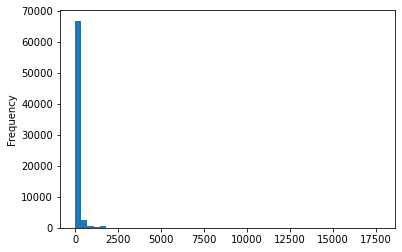

In [14]:
##visualise
df.price.plot.hist(bins=50);

<AxesSubplot:ylabel='Density'>

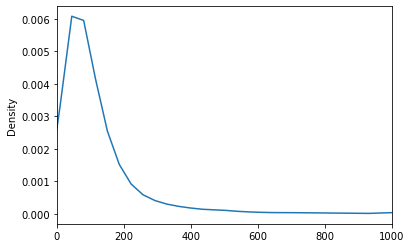

In [15]:
df.price.plot.kde(xlim=(0,1000))

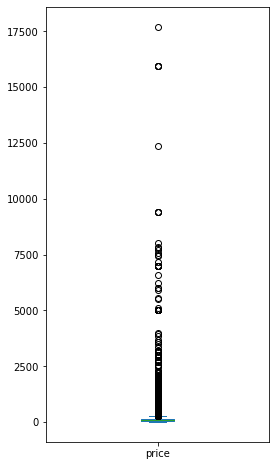

In [16]:
df.price.plot.box(figsize=(4, 8)); # boxplot

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

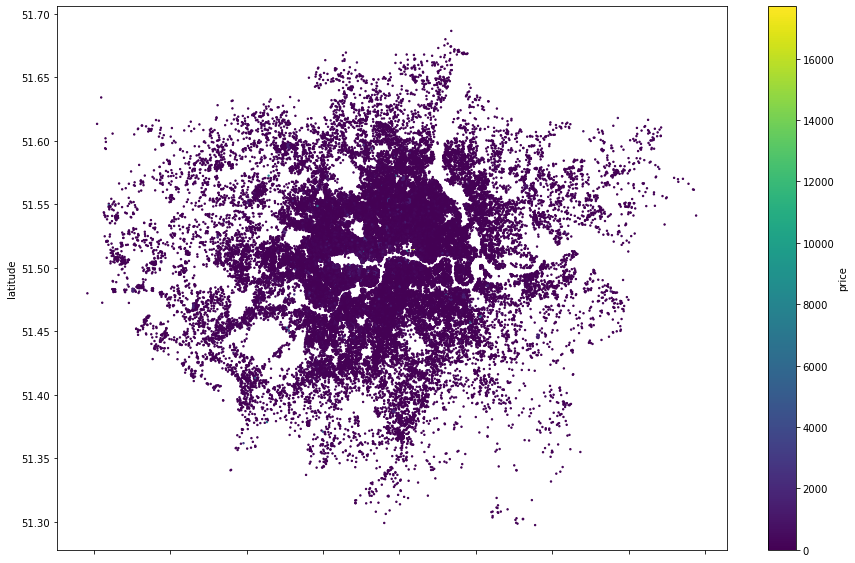

In [17]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=2, cmap='viridis', figsize=(15,10))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

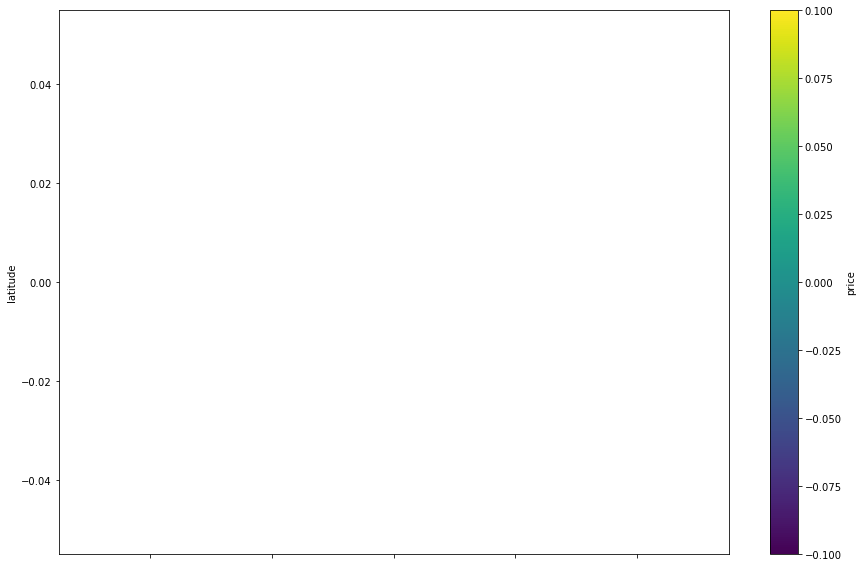

In [18]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=(df.price/df.price.min()), cmap='viridis', figsize=(15,10))

In [19]:
import geopandas as gpd
import pandas as pd


# 读取borough shp文件
borough = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")

borough= borough.to_crs(epsg=27700)
# 读取爱彼迎房价数据
data = df

# 将经纬度转换为点数据
point = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs=4326))

point= point.to_crs(epsg=27700)

# 将房价数据与行政区块数据连接起来

data_borough = gpd.sjoin(point, borough, how="inner",predicate='within')  
data_borough_grouped = data_borough.groupby("GSS_CODE").mean()

In [20]:
data_borough_grouped

,id,latitude,longitude,price,z,index_right,HECTARES,NONLD_AREA
GSS_CODE,,,,,,,,
E09000001,3.196386e+07,51.514657,-0.090680,233.869318,0.318397,32.0,314.942,24.546
E09000002,3.334314e+07,51.543929,0.119642,72.875312,-0.213458,31.0,3779.934,169.150
E09000003,2.920885e+07,51.597112,-0.207674,130.208519,-0.024053,9.0,8674.837,0.000
E09000004,3.359817e+07,51.471995,0.138712,66.356890,-0.234992,14.0,6428.649,370.619
E09000005,2.719853e+07,51.547121,-0.237826,125.802852,-0.038608,8.0,4323.270,0.000
E09000006,2.809019e+07,51.400442,0.002100,78.947748,-0.193397,2.0,15013.487,0.000
E09000007,2.911931e+07,51.537515,-0.148323,148.002035,0.034729,25.0,2178.932,0.000
E09000008,3.118254e+07,51.382928,-0.096320,66.705660,-0.233839,1.0,8649.441,0.000
E09000009,2.768028e+07,51.513824,-0.299246,91.444651,-0.152112,4.0,5554.428,0.000
